In [1]:
HTML(read(open("style.html"), String))

HTML{String}("<link href='https://fonts.googleapis.com/css?family=Alegreya+Sans:100,300,400,500,700,800,900,100italic,300italic,400italic,500italic,700italic,800italic,900italic' rel='stylesheet' type='text/css'>\r\n<link href='https://fonts.googleapis.com/css?family=Arvo:400,700,400italic' rel='stylesheet' type='text/css'>\r\n<link href='https://fonts.googleapis.com/css?family=PT+Mono' rel='stylesheet' type='text/css'>\r\n<link href='https://fonts.googleapis.com/css?family=Shadows+Into+Light' rel='stylesheet' type='text/css'>\r\n<link href='https://fonts.googleapis.com/css?family=Philosopher:400,700,400italic,700italic' rel='stylesheet' type='text/css'>\r\n\r\n<style>\r\n\r\n@font-face {\r\n    font-family: \"Computer Modern\";\r\n    src: url('https://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');\r\n}\r\n\r\n.container { width: 100% }\r\n\r\n/* Formatting for header cells */\r\n.text_cell_render h1 {\r\n    font-family: 'Philosopher', sans-serif;\r\n    font-weight: 400;\r\n    font-size: 2.2em;\r\n    line-height: 100%;\r\n    color: rgb(0, 80, 120);\r\n    margin-bottom: 0.1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\t\r\n.text_cell_render h2 {\r\n    font-family: 'Philosopher', serif;\r\n    font-weight: 400;\r\n    font-size: 1.9em;\r\n    line-height: 100%;\r\n    color: rgb(200,100,0);\r\n    margin-bottom: 0.1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\t\r\n\r\n.text_cell_render h3 {\r\n    font-family: 'Philosopher', serif;\r\n    margin-top:12px;\r\n    margin-bottom: 3px;\r\n    font-style: italic;\r\n    color: rgb(94,127,192);\r\n}\r\n\r\n.text_cell_render h4 {\r\n    font-family: 'Philosopher', serif;\r\n}\r\n\r\n.text_cell_render h5 {\r\n    font-family: 'Alegreya Sans', sans-serif;\r\n    font-weight: 300;\r\n    font-size: 16pt;\r\n    color: grey;\r\n    font-style: italic;\r\n    margin-bottom: .1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\r\n\r\n.text_cell_render h6 {\r\n    font-family: 'PT Mono', sans-serif;\r\n    font-weight: 300;\r\n    font-size: 10pt;\r\n    color: grey;\r\n    margin-bottom: 1px;\r\n    margin-top: 1px;\r\n}\r\n\r\n.text_cell_render em {\r\n    font-family: 'Philosopher', sans-serif;\r\n    color:        blue;\r\n    background-color: rgb(255,220,180);\r\n    font-size:    110%;\r\n    margin-left:   2px;\r\n    margin-right:  2px;\r\n    font-weight:   100;\r\n}\r\n\r\n.text_cell_render b {\r\n    color:            rgb(255,195,195);\r\n    background-color: rgb(0,0,0);\r\n    font-size:    110%;\r\n    margin-left:   2px;\r\n    margin-right:  2px;\r\n    font-weight:   650;\r\n}\r\n\r\n.text_cell_render tt {\r\n    font-size:    120%;\r\n    margin-left:   2px;\r\n    margin-right:  2px;\r\n    font-weight:   150;\r\n}\r\n\r\n.Codemirror {\r\n    font-family: \"PT Mono\", sans-serif;\r\n    font-size: 100%;\r\n}\r\n\r\n</style>")

In [ ]:
include("silent.jl")

In [1]:
using Pkg
@silent Pkg.add("Chess")
import Chess
@silent Pkg.add("NBInclude")
using NBInclude

In [7]:
@nbinclude "3.1 - Evaluation.ipynb"

evaluateEPCaptureScoreDelta (generic function with 1 method)

***

# Minimax

Der [Minimax Algorithmus](https://www.chessprogramming.org/Minimax) ermittelt die optimale Spielstrategie (den besten Zug) für eine gegebene Suchtiefe. 

Hierbei gilt: je größer die Suchtiefe, desto besser der ermittelte Zug. Bei einer Suchtiefe von unendlich ist garantiert, den besten Zug gefunden zu haben. In der Realität wird das Suchproblem mit ansteigender Suchtiefe exponentiell komplex.

Um eine möglichst große Suchtiefe in absehbarer Zeit zu berechnen, gilt es, die Laufzeit der Positions-Evaluation zu minimieren.

Es wurde sich hier für die Standard-Implementierung entschieden. Dabei gilt es für Spieler "Weiß" den Wert zu maximieren um zu gewinnen, für Spieler "Schwarz" den Wert zu minimieren. Ein Unentschieden wird durch den Wert `0` repräsentiert.

Der MiniMax-Algorithmus wird verwendet, um den Verlust eines Worst-Case-Szenarios zu minimieren. Auf Schach bezogen, bedeutet dies, dass der Spieler "Weiß" den Zug wählt, dessen Antwort seitens Spieler "Schwarz", den größten Nutzen für Spieler "Weiß" hat. Der mögliche Verlust für "Weiß" wird also minimiert.

Für die Berechnung des bestmöglichen Zuges muss eine Suchtiefe `depth` definiert werden. Diese gibt an wie viele Halbzüge in die Zukunft geschaut werden soll. Eine Suchtiefe von 3 berechnet den gewünschten Zug basierend auf dem nächsten Zug von "Schwarz" der Antwort von "Weiß" und der anschließenden Antwort von "Schwarz". Da pro Suchtiefe fast immer mehrere Züge möglich sind, baut sich ein großer Suchbaum auf.

Es lassen sich folgenden Regeln definieren:
+ Knoten auf gerader Tiefe (Weiß am Zug) &rarr; Bewertung des Knotens ist das **Maximum** seiner Kinder
+ Knoten auf ungerader Tiefe (Schwarz am Zug) &rarr; Bewertung des Knotens ist das **Minimum** seiner Kinder

Ein möglicher Suchbaum ist grafisch in der nächsten Abbildung dargestellt. Er zeigt beispielhaft das Verhalten des Algorithmus auf. `100` steht für einen Sieg von "Weiß", `-100` für den Sieg von "Schwarz".
+ Tiefe 0 und 2 &rarr; "Weiß" ist am Zug &rarr; Bewertung des Knotens ist das **Maximum** seiner Kinder
+ Tiefe 1 und 3 &rarr; "Weiß" ist am Zug &rarr; Bewertung des Knotens ist das **Minimum** seiner Kinder
Das Ergebnis ist, dass ein Zug der Wertigkeit `4` gewählt wird.
<br>

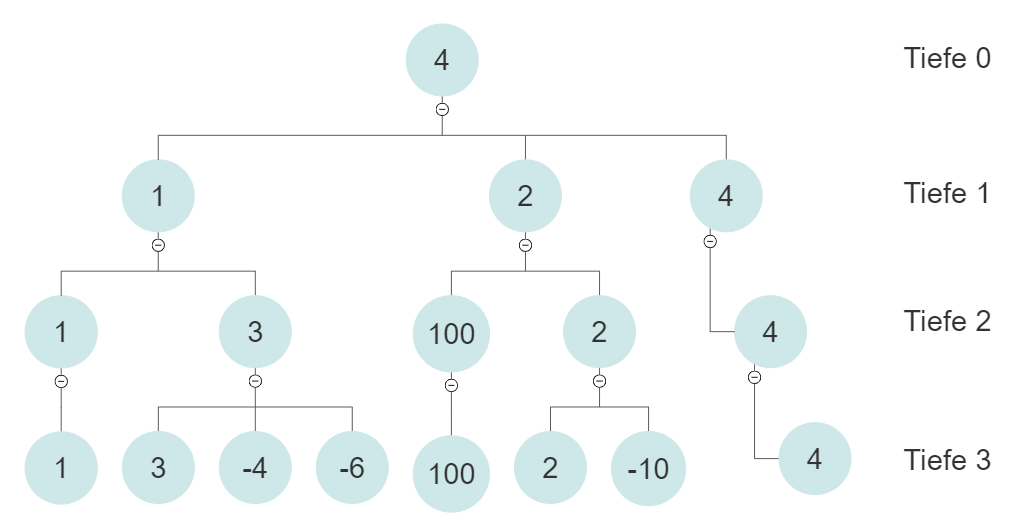
<br>

Alternativ kann die Suche dieser Abbildung auch als Formel dargestellt werden:
+ $ Minimax = MAX ((MIN(MAX(1), MAX(3, -4, -6)), MIN(MAX(100), MAX(2, -10)), MIN(MAX(4))) $

***

Die Funktion `minimaxMax` sucht den bestmöglichen Zug aus der Sicht von Spieler "Weiß" in Abhängigkeit von der Suchtiefe. Da "Weiß" den maximierten Wert seiner Kinder berechnet, deren Werte wiederum das Minimum (da "Schwarz" minimiert) ihrer Kinder sind, maximiert "Weiß" die Minima von "Schwarz" für alle möglichen Züge.

Die Tiefe der Berechnung ist insofern wichtig, dass ein Zug der zu einem Matt in 2 Zügen führt, einem Zug der zu einem Matt in 5 Zügen führt, bevorzugt wird. Das Matt in 2 Zügen wird jedoch nur mit einer Suchtiefe von 4 gefunden. Es gilt: je größer die Suchtiefe, desto besser der ermittelte Zug.

**Input**:
+ extboard &rarr; der aktuelle Spielstand der Berechnung
+ depth &rarr;  Suchtiefe (maximale Suchtiefe - aktuelle Suchtiefe)

**Output**:
+ maxValue &rarr; der maximierte, bestmögliche Score der aktuellen Suche

In [3]:
function minimaxMax(extboard::ExtendedBoard, depth::Int64)::Int32
    if extboard.repetitionRuleDraw
        return 0
    end
    legalMoves = Chess.moves(extboard.board)
    if length(legalMoves) == 0
        return evaluateTerminalPositionScore(extboard.board)
    elseif depth == 0
        return extboard.score
    end
    maxValue = typemin(Int32)
    for move ∈ legalMoves
        undo = domove!(extboard, move)
        value = minimaxMin(extboard, depth - 1)
        undomove!(extboard, undo)
        maxValue = max(maxValue, value)
    end
    Chess.recycle!(legalMoves)
    return maxValue
end

minimaxMax (generic function with 1 method)

Die Funktion `minimaxMin` sucht den bestmöglichen Zug aus der Sicht von Spieler "Schwarz" in Abhängigkeit von der Suchtiefe. Da "Schwarz" den minimierten Wert seiner Kinder berechnet, deren Werte wiederum das Maximum (da "Weiß" maximiert) ihrer Kinder sind, minimiert "Schwarz" die Maxima von "Weiß" für alle möglichen Züge.

**Input**:
+ extboard &rarr; der aktuelle Spielstand der Berechnung
+ depth &rarr; Suchtiefe (maximale Suchtiefe - aktuelle Suchtiefe)

**Output**:
+ minValue &rarr; der minimierte, bestmögliche Score der aktuellen Suche

In [4]:
function minimaxMin(extboard::ExtendedBoard, depth::Int64)::Int32
    if extboard.repetitionRuleDraw
        return 0
    end
    legalMoves = Chess.moves(extboard.board)
    if length(legalMoves) == 0
        return evaluateTerminalPositionScore(extboard.board)
    elseif depth == 0
        return extboard.score
    end
    minValue = typemax(Int32)
    for move ∈ legalMoves
        undo = domove!(extboard, move)
        value = minimaxMax(extboard, depth - 1)
        undomove!(extboard, undo)
        minValue = min(minValue, value)
    end
    Chess.recycle!(legalMoves)
    return minValue
end

minimaxMin (generic function with 1 method)

Die Funktion `minimax` berechnet mithilfe der bereits beschriebenen Funktionen `minimaxMax` und `minimaxMin` das bestmögliche Vorgehen der KI. Dabei wird ein Array an bestmöglichen Zügen ausgegeben.

**Input**:
+ extboard &rarr; der aktuelle Spielstand
+ depth &rarr; die gewünschte Suchtiefe
+ log &rarr; die zu verwendende Log-Funktion

**Output**:
+ minmaxValue &rarr; der bestmögliche Score unter der gewünschten Suchtiefe
+ scoredMoves[minmaxValue] &rarr; alle Züge mit dem bestmöglichen Score

In [5]:
function minimax(extboard::ExtendedBoard, depth::Int64, log::Function)::Tuple{Int32, Vector{Chess.Move}}
    legalMoves = Chess.moves(extboard.board)
    sideIsWhite = Chess.sidetomove(extboard.board) == Chess.WHITE
    scoredMoves = Dict{Int32, Vector{Chess.Move}}()
    minmaxValue = sideIsWhite ? typemin(Int32) : typemax(Int32)
    for move ∈ legalMoves
        undo = domove!(extboard, move)
        if sideIsWhite
            value = minimaxMin(extboard, depth - 1)
            minmaxValue = max(value, minmaxValue)
        else
            value = minimaxMax(extboard, depth - 1)
            minmaxValue = min(value, minmaxValue)
        end
        movesWithSameScore = get(scoredMoves, value, Chess.Move[])
        push!(movesWithSameScore, move)
        scoredMoves[value] = movesWithSameScore
        log("score = $(value), move = $(move)")
        undomove!(extboard, undo)
    end
    return minmaxValue, scoredMoves[minmaxValue]
end

minimax (generic function with 1 method)

***